# EDA projerct


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Influencer company 27
שמות הקבוצה: עמית טיקוצ'ינסקי, רננה קינן וקובי קראדי

דאטה של חברת סטרטאפ המתעסקת בפרסום עסקים ע"י שיתוף סטורי באינסטגרם של משפיעני רשת. המשפענים מעלים סטורי תמורת מתנות מאותה חברה. הרווחים של החברת הסטרטאפ הם מעמלות העסקאות 

<img src="https://cdn2.avada.io/media/resources/V1DnoNc.jpg" width="600"/>

In [2]:
url = 'https://raw.githubusercontent.com/kobykarady/myproject1/main/newData.csv'
data_in = pd.read_csv(url)

In [3]:
data_in.head()

,VisitId,InfluencerId,BusinessId,BrandId,Date,Hour,Weekday,Level,Status,Gender,...,Age,LoginsBeforeDeal,City,Long,Lat,Fashion,Beauty,Foody,Sport,Model
0,JZusiD47LQXpClSOZ2Cg,1975810889,ej1DBVA98tHV6xZIyJMP,Nfgn9c4Q8iOWrkdLaBdF,12-31-2021,22,5,20,1,1,...,27,33,תל אביב-יפו,34.774493,32.062645,0,0,2,0,2
1,2tYv2pf0Ks1xKi0b2Wm1,221790070,ej1DBVA98tHV6xZIyJMP,Nfgn9c4Q8iOWrkdLaBdF,12-31-2021,22,5,40,2,1,...,21,189,תל אביב-יפו,34.774493,32.062645,2,0,2,0,0
2,sy1ixUggxZDcwRdMOWeq,282367579,edfi5D5TbquWiC4jjFqW,W84OVIV0q7ERGP8xa8o6,12-31-2021,22,5,20,1,1,...,27,82,תל אביב-יפו,34.772880,32.063114,2,0,2,0,0
3,53t5YGCJXAsFckSljBeE,282367579,tUB85hi8UtnHBmIQJBoo,RaogcDulcpkeJ1FY5UHP,12-31-2021,22,5,20,1,1,...,27,82,תל אביב-יפו,34.773504,32.063855,2,0,0,0,0
4,gfwGBUMNqf9oS7aEHY8Q,462261225,edfi5D5TbquWiC4jjFqW,W84OVIV0q7ERGP8xa8o6,12-31-2021,22,5,20,1,1,...,24,4,תל אביב-יפו,34.772880,32.063114,0,0,2,0,0


---
### 1. Wrangling data

In [4]:
data_in.dtypes

VisitId              object
InfluencerId          int64
BusinessId           object
BrandId              object
Date                 object
Hour                  int64
Weekday               int64
Level                 int64
Status                int64
Gender                int64
Followers             int64
Engagement            int64
Age                   int64
LoginsBeforeDeal      int64
City                 object
Long                float64
Lat                 float64
Fashion               int64
Beauty                int64
Foody                 int64
Sport                 int64
Model                 int64
dtype: object

שינוי עמודות מין וימים לקטגורית סוג אובגקט

In [5]:
data_in['Gender'] = data_in['Gender'].replace([0],'Male')
data_in['Gender'] = data_in['Gender'].replace([1],'Female')
data_in['Gender'] = data_in['Gender'].replace([2],'No_sex')

שינוי ימים:

In [6]:
data_in['Weekday'] = data_in['Weekday'].replace([0],"Sun")
data_in['Weekday'] = data_in['Weekday'].replace([1],'Mon')
data_in['Weekday'] = data_in['Weekday'].replace([2],'Tue')
data_in['Weekday'] = data_in['Weekday'].replace([3],'Wed')
data_in['Weekday'] = data_in['Weekday'].replace([4],'Thu')
data_in['Weekday'] = data_in['Weekday'].replace([5],'Fri')
data_in['Weekday'] = data_in['Weekday'].replace([6],'Sat')

בדיקה

In [7]:
data_in.head()

,VisitId,InfluencerId,BusinessId,BrandId,Date,Hour,Weekday,Level,Status,Gender,...,Age,LoginsBeforeDeal,City,Long,Lat,Fashion,Beauty,Foody,Sport,Model
0,JZusiD47LQXpClSOZ2Cg,1975810889,ej1DBVA98tHV6xZIyJMP,Nfgn9c4Q8iOWrkdLaBdF,12-31-2021,22,Fri,20,1,Female,...,27,33,תל אביב-יפו,34.774493,32.062645,0,0,2,0,2
1,2tYv2pf0Ks1xKi0b2Wm1,221790070,ej1DBVA98tHV6xZIyJMP,Nfgn9c4Q8iOWrkdLaBdF,12-31-2021,22,Fri,40,2,Female,...,21,189,תל אביב-יפו,34.774493,32.062645,2,0,2,0,0
2,sy1ixUggxZDcwRdMOWeq,282367579,edfi5D5TbquWiC4jjFqW,W84OVIV0q7ERGP8xa8o6,12-31-2021,22,Fri,20,1,Female,...,27,82,תל אביב-יפו,34.772880,32.063114,2,0,2,0,0
3,53t5YGCJXAsFckSljBeE,282367579,tUB85hi8UtnHBmIQJBoo,RaogcDulcpkeJ1FY5UHP,12-31-2021,22,Fri,20,1,Female,...,27,82,תל אביב-יפו,34.773504,32.063855,2,0,0,0,0
4,gfwGBUMNqf9oS7aEHY8Q,462261225,edfi5D5TbquWiC4jjFqW,W84OVIV0q7ERGP8xa8o6,12-31-2021,22,Fri,20,1,Female,...,24,4,תל אביב-יפו,34.772880,32.063114,0,0,2,0,0


In [8]:
data_in.dtypes

VisitId              object
InfluencerId          int64
BusinessId           object
BrandId              object
Date                 object
Hour                  int64
Weekday              object
Level                 int64
Status                int64
Gender               object
Followers             int64
Engagement            int64
Age                   int64
LoginsBeforeDeal      int64
City                 object
Long                float64
Lat                 float64
Fashion               int64
Beauty                int64
Foody                 int64
Sport                 int64
Model                 int64
dtype: object

#### 1.2 Missing values

In [9]:
data_in.isnull().sum().sort_values(ascending=False)

City                1215
VisitId                0
InfluencerId           0
Sport                  0
Foody                  0
Beauty                 0
Fashion                0
Lat                    0
Long                   0
LoginsBeforeDeal       0
Age                    0
Engagement             0
Followers              0
Gender                 0
Status                 0
Level                  0
Weekday                0
Hour                   0
Date                   0
BrandId                0
BusinessId             0
Model                  0
dtype: int64

לאחר בירור החברה - מסתבר שהערכים החסרים הם משלוחים - לכן נמלא כך

In [10]:
data_in['City'] =data_in['City'].fillna('Delivery')

#### 1.3 Noisy data - outliers

בדיקת עמודות נומריות

In [11]:
features = ["VisitId","Hour", "Level","Status", "Followers","Engagement", "Age", "LoginsBeforeDeal","Fashion","Beauty","Foody","Sport","Model"]

In [12]:
# melted_in_df = pd.melt(data_in[features], id_vars = 'VisitId', value_vars = features)
# melted_in_df

In [13]:
# g = sns.FacetGrid(data = melted_in_df, col="variable",  col_wrap=4, sharey=False)
# g.map_dataframe(sns.boxplot, y = 'value')
# plt.show()

ערכים תקינים פרט לגיל 0, לרמה 0 ו255

In [14]:
data_in.Level.sort_values(ascending = True)

7119       0
7335       0
21292      0
2892       0
7534       0
        ... 
15246    255
6417     255
1867     255
44604    255
4530     255
Name: Level, Length: 46152, dtype: int64

In [15]:
data_in.Followers.sort_values(ascending = True)

4530          249
2960          465
23355         696
23426         696
23427         696
           ...   
18900    23611114
18880    23611114
18879    23611114
30337    23611114
30622    23611114
Name: Followers, Length: 46152, dtype: int64

In [16]:
data_in.loc[data_in.Followers == data_in.Followers.max(),["Level"]]

,Level
4510,10
7607,10
7611,50
10506,50
10528,10
...,...
32155,10
32159,10
32182,10
32206,10


In [17]:
data_in.Age.sort_values(ascending = True)

8855      0
39345     0
44816     0
20401     0
20394     0
         ..
7046     59
9948     59
41046    59
37934    59
7605     59
Name: Age, Length: 46152, dtype: int64

הסבר לערכים חריגים בעמודת העוקבים ועמודת הלייקים :
נובע מכך שקיימים מפורסמים עם רמת השפעה גבוהה מאחרים

#### 1.4 Transformations

לאחר בירור עם החברה - רמה 255 הם מפעילים של החברה ורמה 0 זה חריגה ,וגיל 0 אילו אנשים שלא מילאו ערכים ולכן הסרנו אותם

In [18]:
data_in=data_in[data_in.Age != 0] 
data_in = data_in[data_in.Level != 255].copy()
data_in = data_in[data_in.Level != 0].copy()
data_in = data_in[(data_in.Gender == 'Male')|(data_in.Gender == 'Female') ].copy()
data_in.loc[data_in["Age"]<55 , "Age Group"]="44-55"
data_in.loc[data_in["Age"]<41 , "Age Group"]="35-40"
data_in.loc[data_in["Age"]<35 , "Age Group"]="30-34"
data_in.loc[data_in["Age"]<30 , "Age Group"]="25-29"
data_in.loc[data_in["Age"]<25 , "Age Group"]="18-25"
data_in.loc[data_in["Age"]<18 , "Age Group"]="14-17"


In [19]:
data_in.Level.sort_values(ascending = True)

16819    10
13792    10
2277     10
31678    10
31681    10
         ..
32958    50
10257    50
10262    50
32965    50
14517    50
Name: Level, Length: 44208, dtype: int64

In [20]:
data_in=data_in.drop(['Lat', 'Long'], axis=1)

הורדת עמודות של קווי אורך ורוחב בגלל שאין לנו שימוש בהם

In [21]:
import datetime
data_in['day']=pd.DatetimeIndex(data_in['Date']).day
data_in['month']=pd.DatetimeIndex(data_in['Date']).month
data_in['year']=pd.DatetimeIndex(data_in['Date']).year

הוספת עמודות של יום חודש ושנה על מנת למצוא תובנות שקשורות בפרמטרים אלו

### 2. Understand the data

הוספת עמודות נומריות

In [22]:
data_in.loc[data_in.Status == 0,'Deal']=1
data_in.loc[data_in.Status == 1,'Recieved']=1
data_in.loc[data_in.Status == 2,'Read']=1
data_in['Deal'] = data_in['Deal'].fillna(0)
data_in['Recieved'] = data_in['Recieved'].fillna(0)
data_in['Read'] =data_in['Read'].fillna(0)
data_in

,VisitId,InfluencerId,BusinessId,BrandId,Date,Hour,Weekday,Level,Status,Gender,...,Foody,Sport,Model,Age Group,day,month,year,Deal,Recieved,Read
0,JZusiD47LQXpClSOZ2Cg,1975810889,ej1DBVA98tHV6xZIyJMP,Nfgn9c4Q8iOWrkdLaBdF,12-31-2021,22,Fri,20,1,Female,...,2,0,2,25-29,31,12,2021,0.0,1.0,0.0
1,2tYv2pf0Ks1xKi0b2Wm1,221790070,ej1DBVA98tHV6xZIyJMP,Nfgn9c4Q8iOWrkdLaBdF,12-31-2021,22,Fri,40,2,Female,...,2,0,0,18-25,31,12,2021,0.0,0.0,1.0
2,sy1ixUggxZDcwRdMOWeq,282367579,edfi5D5TbquWiC4jjFqW,W84OVIV0q7ERGP8xa8o6,12-31-2021,22,Fri,20,1,Female,...,2,0,0,25-29,31,12,2021,0.0,1.0,0.0
3,53t5YGCJXAsFckSljBeE,282367579,tUB85hi8UtnHBmIQJBoo,RaogcDulcpkeJ1FY5UHP,12-31-2021,22,Fri,20,1,Female,...,0,0,0,25-29,31,12,2021,0.0,1.0,0.0
4,gfwGBUMNqf9oS7aEHY8Q,462261225,edfi5D5TbquWiC4jjFqW,W84OVIV0q7ERGP8xa8o6,12-31-2021,22,Fri,20,1,Female,...,2,0,0,18-25,31,12,2021,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46147,RllmNy60I7dZSXAVNHQH,250226968,ej1DBVA98tHV6xZIyJMP,Nfgn9c4Q8iOWrkdLaBdF,04-27-2022,16,Wed,40,1,Female,...,2,0,0,25-29,27,4,2022,0.0,1.0,0.0
46148,pRaiFSiZpLca7AdI7VT8,539756490,4WPYqItwgvLj0YjCGV1W,Tjscw9OUx85mEgl9ACsz,04-27-2022,16,Wed,40,1,Female,...,0,0,0,18-25,27,4,2022,0.0,1.0,0.0
46149,j8QBz9BzVZ3frsXaTejJ,568770391,tekEGDMqF93UP9R0MD9t,0efGKdQVFlISFuwCkiJ4,04-27-2022,16,Wed,30,1,Male,...,3,0,0,18-25,27,4,2022,0.0,1.0,0.0
46150,4cd7b62b-a517-4328-a67b-29280878d2ee,8750283576,XNyXdZlz6qWVWB3qtXH3,kUdMkyD9lD9UDCj0BLuM,04-27-2022,16,Wed,20,0,Female,...,2,0,2,25-29,27,4,2022,1.0,0.0,0.0


### 3. Correlations - patterns in the data

In [23]:
features2 = ["VisitId","Hour", "Weekday", "Level","Status", "Followers","Engagement", "LoginsBeforeDeal","Fashion","Beauty","Foody","Sport","Model","Read","Deal","Recieved"]

In [24]:
melted_in_df2 = pd.melt(data_in[features2], id_vars = 'VisitId', value_vars = features2)


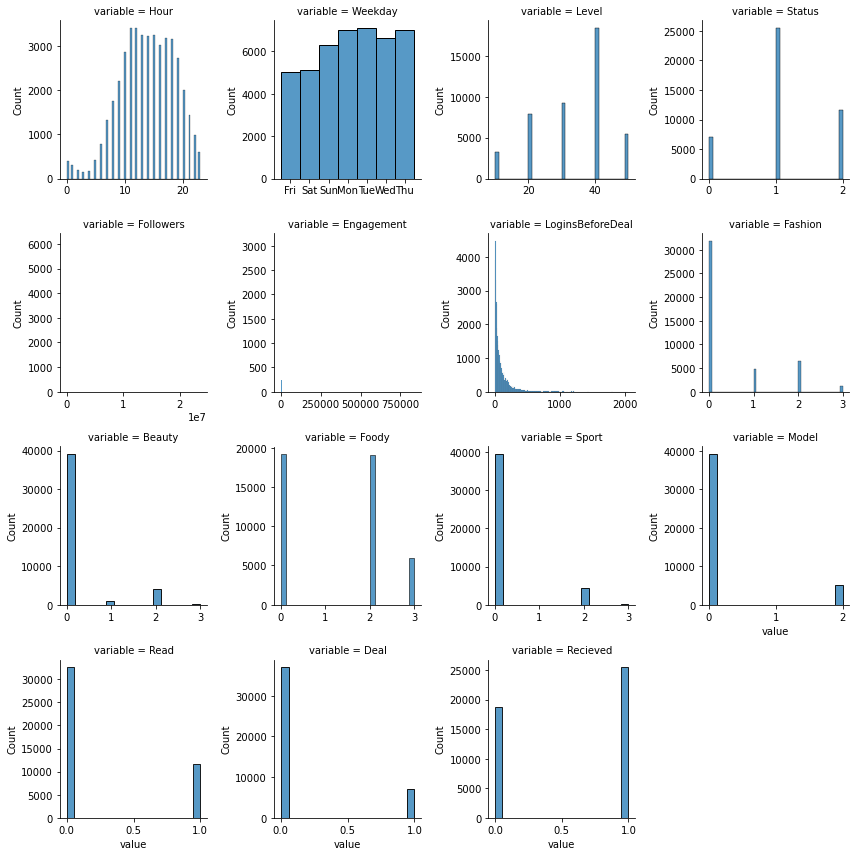

In [25]:
g = sns.FacetGrid(data = melted_in_df2, col="variable",  col_wrap=4,sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x = "value")
plt.show()

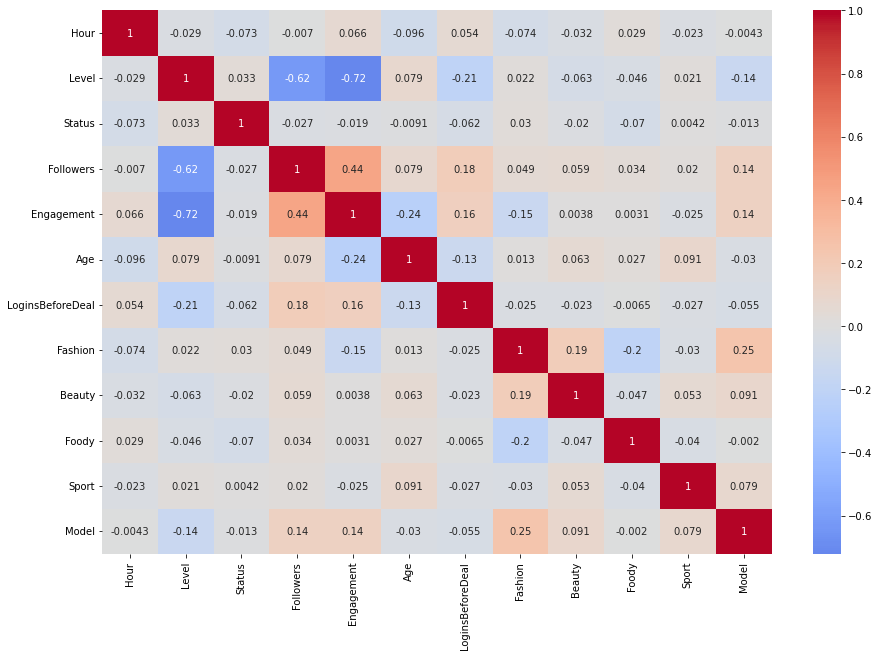

In [26]:
features2 = ["Hour", "Level","Status", "Followers","Engagement", "Age", "LoginsBeforeDeal","Fashion","Beauty","Foody","Sport","Model"]
corrs = data_in[features2].corr(method = 'spearman')
plt.figure(figsize=(15,10))  #figure size
sns.heatmap(corrs, cmap='coolwarm', center=0, annot = True);

כיוון שהדאטה שלנו קטגורי - אין קורלוציה בין עמודות פרט לקשר בין הרמה לכמות העוקבים (הרמה היא לפי כמות העוקבים - ולכן לא ניתן להוציא מסקנה ממשית)

### 4. Observations

# ניתוח לפי זמן

<img src="https://static8.depositphotos.com/1472772/997/i/950/depositphotos_9975863-stock-photo-hourglass-sandglass-sand-timer-sand.jpg" width="300"/>

<AxesSubplot:xlabel='Hour', ylabel='count'>

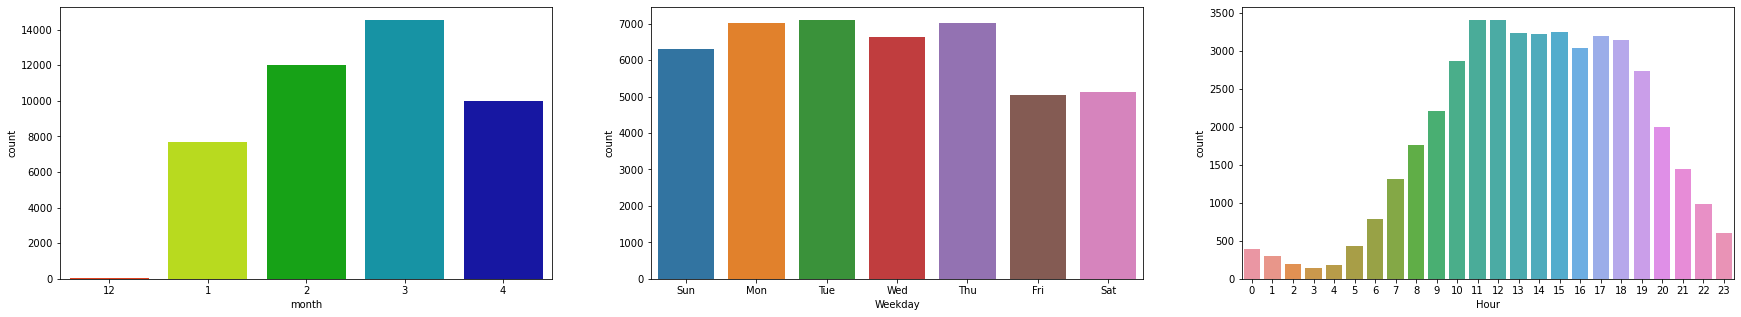

In [27]:
fig, axes = plt.subplots(figsize=(30, 5), ncols=3)

sns.countplot(data = data_in,x= 'month', ax = axes[0], palette = 'nipy_spectral_r',order = [12,1,2,3,4])
sns.countplot(data = data_in,x= 'Weekday', ax = axes[1],order = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])
sns.countplot(data = data_in,x= 'Hour', ax = axes[2])

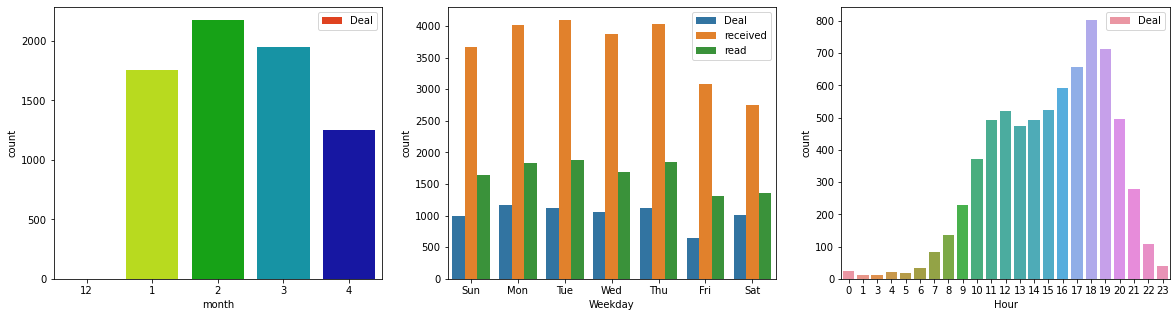

In [28]:
data_Deal = data_in.loc[data_in.Status == 0].copy()
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
lan1 = sns.countplot(data = data_Deal,x= 'month',palette = 'nipy_spectral_r' , ax = axes[0],order = [12,1,2,3,4])
lan2 = sns.countplot(data = data_in,x= 'Weekday', ax = axes[1] , hue = 'Status',order = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"])
lan3 = sns.countplot(data = data_Deal,x= 'Hour', ax = axes[2])
lan1.legend(labels = ['Deal'])
lan2.legend(labels = ['Deal','received','read'])
lan3.legend(labels = ['Deal'])

<AxesSubplot:xlabel='Date'>

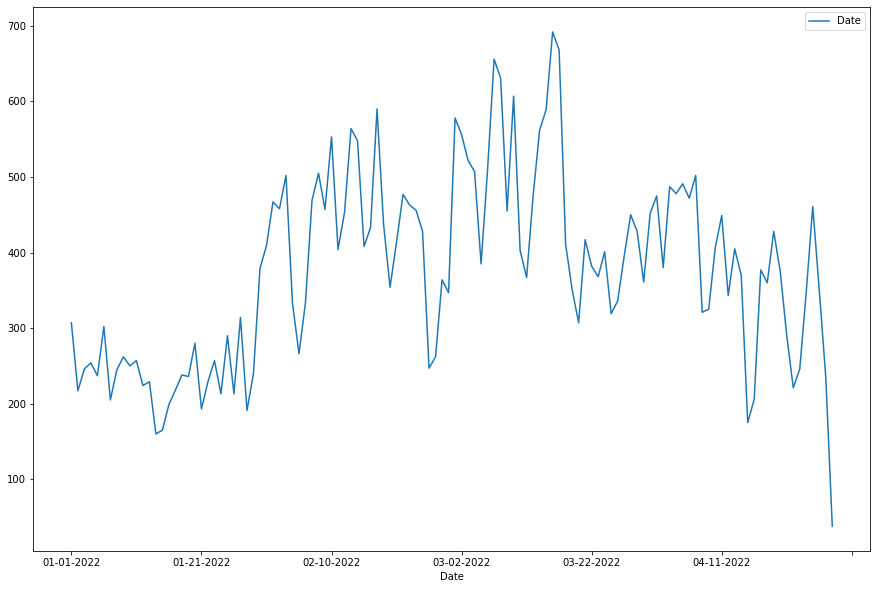

In [29]:
data_time = data_in.groupby('Date')['Date'].count()
data_time = pd.DataFrame(data_time)
data_time.plot.line( y = 'Date' , figsize=(15, 10))


* ניתן לראות ירידה בחודש אפריל , ככל הנראה כתוצאה מגל הפיגועים שאנשים פחדו להסתובב ברחובות או פשוט חוסר נעימות לעלות סטורי בימים אילו
* למרות שבשבת יש פחות אסמסים , כמות העסקאות גבוהה 
* ביום שישי מספר העסקאות הוא הנמוך ביותר 
* השעות הפעילות ביותר הם בשעות אחה"ע - זמן ארוחת ערב
* שעות הבוקר יש מעט פעילות

# ניתוח ריווחיות לפי רמה

In [30]:
data_id = data_in.groupby('InfluencerId')
data_id= data_id.first()

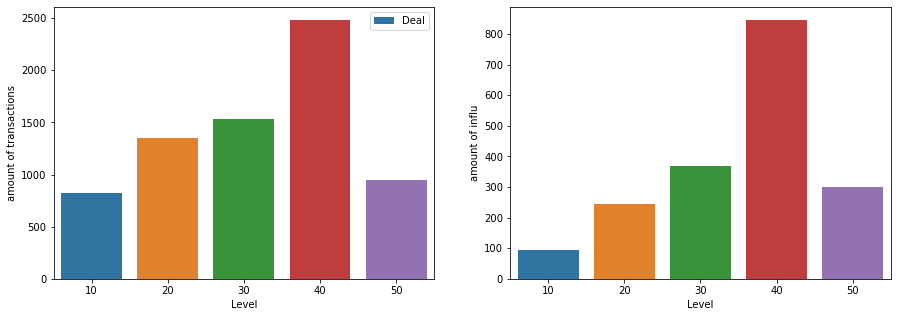

In [31]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)

z= sns.countplot(data = data_Deal,x= 'Level' , ax = axes[0])
x= sns.countplot(data = data_id,x= 'Level', ax = axes[1])
x.set_ylabel("amount of influ")
z.set_ylabel("amount of transactions")
z.legend(labels = ['Deal' ])

?דירוג מספר ההעסקאות ע"פ רמה זהה לדירוג מספר המשפיענים ע"פ רמה. האם זה גם דירוג הרווחיות


In [32]:

data_Level = data_Deal.groupby('Level')[['Engagement']].sum()
data_Level['Deal'] = data_in.groupby('Level')[['Deal']].sum()
data_Level['sum_influ'] = data_id.groupby('Level')[['Level']].count()
data_Level['engage_per_influ'] = data_Level.Engagement/data_Level.sum_influ
data_Level['deals_per_influ'] = data_Level.Deal/data_Level.sum_influ
data_Level['price']=[160,140,110,70,20]
data_Level['profit_per_influ']=data_Level.deals_per_influ*data_Level.price
data_Level['precentage_pro_per_influ'] = data_Level.profit_per_influ*100/data_Level.profit_per_influ.sum()
data_Level['total_profit_per_level']=data_Level.Deal*data_Level.price
data_Level['precentage_sum_pro'] = data_Level.total_profit_per_level*100 /data_Level.total_profit_per_level.sum()
data_Level

,Engagement,Deal,sum_influ,engage_per_influ,deals_per_influ,price,profit_per_influ,precentage_pro_per_influ,total_profit_per_level,precentage_sum_pro
Level,,,,,,,,,,
10,5356148,824.0,93,57592.989247,8.860215,160,1417.634409,48.655513,131840.0,19.329111
20,3177495,1348.0,245,12969.367347,5.502041,140,770.285714,26.437455,188720.0,27.668309
30,1922190,1535.0,369,5209.186992,4.159892,110,457.588076,15.705165,168850.0,24.755161
40,1550171,2483.0,846,1832.353428,2.934988,70,205.449173,7.051349,173810.0,25.482348
50,552407,943.0,301,1835.239203,3.132890,20,62.657807,2.150518,18860.0,2.765072


Text(0.5, 0, 'Percentage of incomes by level')

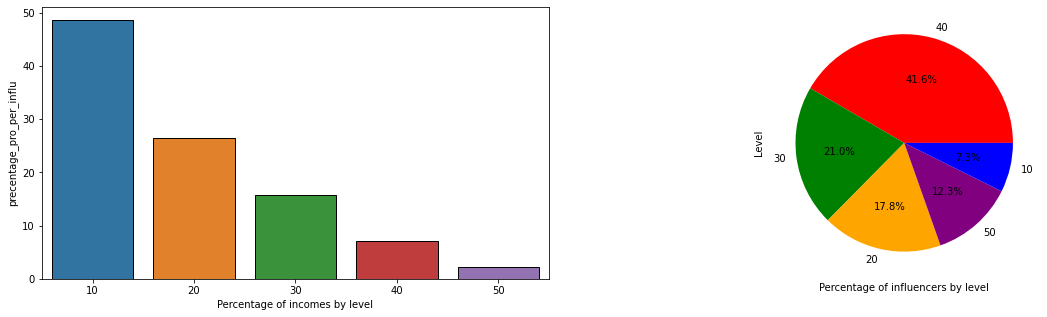

In [33]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=2)
#plt2= sns.barplot(data = data_Level,x=data_Level.index, y='total_profit_per_level',edgecolor = 'black',ax= axes[1])
plt3 =sns.barplot(data = data_Level,x=data_Level.index, y='precentage_pro_per_influ',edgecolor = 'black',ax= axes[0])
plt1 = data_in['Level'].value_counts().plot.pie(autopct='%1.1f%%',ax= axes[1],colors = ['red','green','orange','purple', 'blue'])
plt1.set_xlabel("Percentage of influencers by level")
#plt2.set_xlabel("Incomes by level")
plt3.set_xlabel("Percentage of incomes by level")

* ניתן לראות שרמות 40 ו50 מהווים פחות מ10% מכלל ההכנסות החברה למרות שהם 63% מכלל המשפיענים 
* ניתן לראות שרמה 10 היא הרווחית ביותר ומהווה כ 50% מהכנסות החברה למרות שרמה 10 היא רק 7% מכלל המשפיענים

# ניתוח רווחיות לפי מגדר 

<img src="https://wp02-media.cdn.ihealthspot.com/wp-content/uploads/sites/486/2019/09/27153206/Testosterone-Levels-in-Men-vs.-Women.jpg" width="400"/>

In [34]:
data_Gender= data_in.groupby('Gender')[['Read']].sum()
data_Gender['Deal'] = data_in.groupby('Gender')[['Deal']].sum()
data_Gender['Recieved'] = data_in.groupby('Gender')[['Recieved']].sum()
data_Gender['precent deal'] = data_Gender.Deal /(data_Gender.Deal +data_Gender.Recieved + data_Gender.Read) 
data_Gender

,Read,Deal,Recieved,precent deal
Gender,,,,
Female,8276.0,4912.0,17492.0,0.160104
Male,3288.0,2221.0,8019.0,0.164178


In [35]:
data_id = data_in.groupby('InfluencerId')
data_id= data_id.first()


משתנה חדש המסודר לפי משפענים

Text(0.5, 0, 'Precent_Deals')

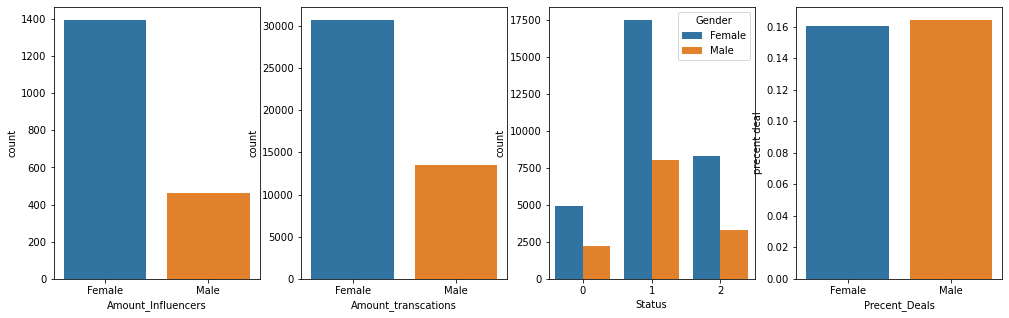

In [36]:
fig, axes = plt.subplots(figsize=(17, 5), ncols=4)

countpolt1 = sns.countplot(data = data_id,x= 'Gender' , ax = axes[0])
countpolt2 = sns.countplot(data = data_in,x= 'Gender' , ax = axes[1])
sns.countplot(data = data_in,x= 'Status',hue = 'Gender', ax = axes[2])
barplot1  = sns.barplot(data = data_Gender,x= data_Gender.index, y = 'precent deal', ax = axes[3])
countpolt1.set_xlabel('Amount_Influencers')
countpolt2.set_xlabel('Amount_transcations')
barplot1.set_xlabel('Precent_Deals')

Text(0.5, 0, 'Percentage of deals')

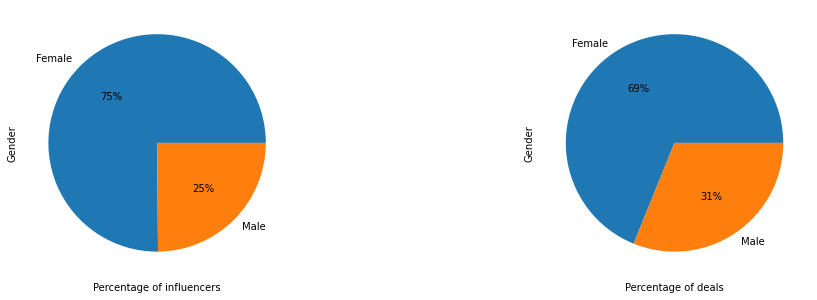

In [37]:
fig, axes = plt.subplots(figsize=(17, 5), ncols=2)
plt1 = data_id['Gender'].value_counts().plot.pie(autopct='%1.f%%',ax= axes[0])
plt1.set_xlabel("Percentage of influencers") 
plt2 = data_Deal['Gender'].value_counts().plot.pie(autopct='%1.f%%',ax= axes[1])
plt2.set_xlabel("Percentage of deals") 

* ניתן לראות שרבע מהמשפענים הם גברים אך הם מבצעים כשליש מכמות העסקאות ולכן הם יותר עדיפים לגיוס  

# ניתוח  קטוגריה הכי רווחית

<img src="https://resources.workable.com/wp-content/uploads/2016/01/category-manager-640x230.jpg" width="400"/>

In [38]:
data_Deal = data_in.loc[data_in.Status == 0].copy()

<AxesSubplot:xlabel='Beauty', ylabel='count'>

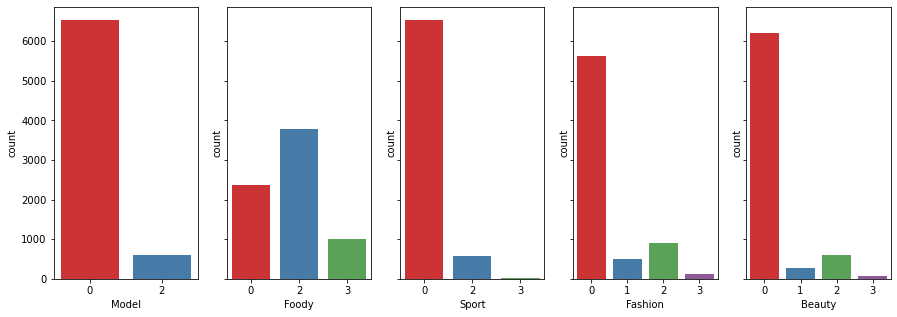

In [39]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=5, sharey = True )#log_scale = True )

sns.countplot(data = data_Deal,x= 'Model',palette = 'Set1' ,ax = axes[0])
sns.countplot(data = data_Deal,x= 'Foody',palette = 'Set1', ax = axes[1])
sns.countplot(data = data_Deal,x= 'Sport',palette = 'Set1', ax = axes[2])
sns.countplot(data = data_Deal,x= 'Fashion',palette = 'Set1', ax = axes[3])
sns.countplot(data = data_Deal,x= 'Beauty',palette = 'Set1', ax = axes[4])

### מקרא:

| Column      | Description |
|:----------- |:----------- |
| 0      | המשפיען וגם העסק לא בקטגוריה       |
| 1       | רק העסק בקטגוריה       |
| 2      | רק המשפיען בקטגוריה    |
| 3       |  העסק והמשפיען באותה קטגוריה      |

<AxesSubplot:xlabel='Foody', ylabel='count'>

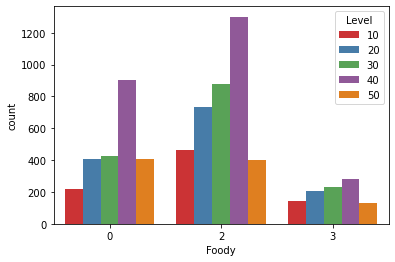

In [46]:
sns.countplot(data = data_Deal,x= 'Foody',palette = 'Set1',hue='Level')

Text(0.5, 0, '3 in Foody per innfluence')

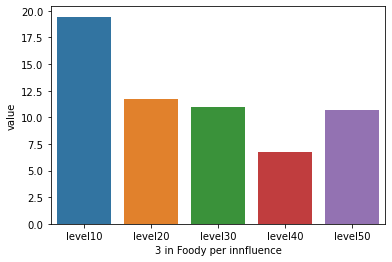

In [47]:
data_level = data_Deal.groupby('Foody')[['Deal']].count()
data_level['level10'] = data_Deal.groupby('Foody')[['Level']].apply(lambda x:(x==10).sum()).fillna(0)/7.3
data_level['level20'] = data_Deal.groupby('Foody')[['Level']].apply(lambda x:(x==20).sum()).fillna(0)/17.8
data_level['level30'] = data_Deal.groupby('Foody')[['Level']].apply(lambda x:(x==30).sum()).fillna(0)/21
data_level['level40'] = data_Deal.groupby('Foody')[['Level']].apply(lambda x:(x==40).sum()).fillna(0)/41.6
data_level['level50'] = data_Deal.groupby('Foody')[['Level']].apply(lambda x:(x==50).sum()).fillna(0)/12.3
data_level = data_level.melt()
data_level= data_level.iloc[[5,8,11,14,17]]
plt= sns.barplot(data = data_level,x= 'variable', y = 'value')
plt.set_xlabel("3 in Foody per innfluence")

* אין קורולציה בין מידת ההתאמה של תחום המשפיען לתחום העסק לבין כמות העסקאות 
* ניתן לראות שהקטגוריה שבה מידת ההתאמה של תחום המשפיען לתחום העסק הגבוהה היותר הכי אוכל
* ניתן לראות שהרמה הדומיננטית היא דווקא רמה 10 ולא 40

# ניתוח רווחיות לפי גיל

<img src="https://changetherapy.files.wordpress.com/2020/07/age.jpg" width="600"/>

In [42]:
data_Age = data_Deal.groupby('Age Group')[['Engagement']].sum()
data_Age['Deal'] = data_in.groupby('Age Group')[['Deal']].sum()
data_Age['sum_influ'] = data_id.groupby('Age Group')[['Age Group']].count()
data_Age['engage_per_influ'] = data_Age.Engagement/data_Age.sum_influ
data_Age['deals_per_influ'] = data_Age.Deal/data_Age.sum_influ

data_Age

,Engagement,Deal,sum_influ,engage_per_influ,deals_per_influ
Age Group,,,,,
14-17,644952,192.0,63,10237.333333,3.047619
18-25,6613543,4068.0,1056,6262.824811,3.852273
25-29,3723539,2016.0,479,7773.567850,4.208768
30-34,1402147,674.0,176,7966.744318,3.829545
35-40,82902,72.0,56,1480.392857,1.285714
44-55,91328,111.0,23,3970.782609,4.826087


<AxesSubplot:xlabel='Age Group', ylabel='deals_per_influ'>

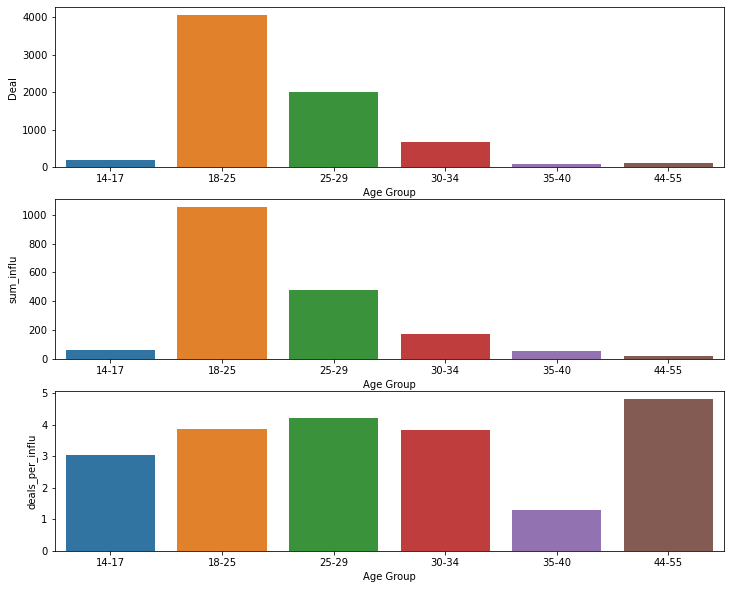

In [43]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,1,figsize=(12,10))#log_scale = True )
sns.barplot(data = data_Age,x=data_Age.index, y='Deal' , ax = axes[0])
sns.barplot(data = data_Age,x=data_Age.index, y='sum_influ',ax = axes[1])
sns.barplot(data = data_Age,x=data_Age.index, y='deals_per_influ',ax = axes[2])

* ניתן לראות שהגיל הרווחי הוא גלאי 18-34 ומשם ירידה 

# Extra to the company

טבלת ריווחיות ערים

In [44]:
data_city = data_in.groupby('City')[['Deal']].sum()
data_city['level10_in_city'] = data_Deal.groupby('City')[['Level']].apply(lambda x:(x==10).sum()).fillna(0)
data_city['level20_in_city'] = data_Deal.groupby('City')[['Level']].apply(lambda x:(x==20).sum()).fillna(0)
data_city['level30_in_city'] = data_Deal.groupby('City')[['Level']].apply(lambda x:(x==30).sum()).fillna(0)
data_city['level40_in_city'] = data_Deal.groupby('City')[['Level']].apply(lambda x:(x==40).sum()).fillna(0)
data_city['level50_in_city'] = data_Deal.groupby('City')[['Level']].apply(lambda x:(x==50).sum()).fillna(0)
data_city['Deal_male'] = data_Deal.groupby('City')[['Gender']].apply(lambda x:(x=='Male').sum()).fillna(0)
data_city['Deal_female'] = data_Deal.groupby('City')[['Gender']].apply(lambda x:(x=='Female').sum()).fillna(0)
data_city['sum_profit'] = (data_city.level10_in_city*160)+(data_city.level20_in_city*140)+(data_city.level30_in_city*110)+(data_city.level40_in_city*70)+(data_city.level50_in_city*20)
data_city = data_city.sort_values('Deal',ascending = False)
data_city

,Deal,level10_in_city,level20_in_city,level30_in_city,level40_in_city,level50_in_city,Deal_male,Deal_female,sum_profit
City,,,,,,,,,
תל אביב-יפו,1990.0,173.0,312.0,507.0,751.0,247.0,629.0,1361.0,184640.0
ראשון לציון,831.0,76.0,194.0,190.0,306.0,65.0,257.0,574.0,82940.0
Delivery,774.0,74.0,125.0,120.0,148.0,307.0,167.0,607.0,59040.0
נתניה,556.0,89.0,107.0,109.0,222.0,29.0,124.0,432.0,57330.0
פתח תקווה,326.0,23.0,71.0,53.0,156.0,23.0,121.0,205.0,30830.0
...,...,...,...,...,...,...,...,...,...
מבשרת ציון,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
כפר אחים,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
רמת ישי,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*  נראה שהערים הכי מכניסות הם תל אביב , ראשון לציון ,נתניה ומשלוחים 

* העיר שבה כמות העסקאות לבית עסק הגבוהה ביותר הם גבעת גרנרת נשר והרצליה פיתוח

בדיקת רשתות הכי משתלמות

In [45]:
data_BusinessId = data_in.groupby('BusinessId')[['Deal']].sum()
data_BusinessId['level10_in_bis'] = data_Deal.groupby('BusinessId')[['Level']].apply(lambda x:(x==10).sum()).fillna(0)
data_BusinessId['level20_in_bis'] = data_Deal.groupby('BusinessId')[['Level']].apply(lambda x:(x==20).sum()).fillna(0)
data_BusinessId['level30_in_bis'] = data_Deal.groupby('BusinessId')[['Level']].apply(lambda x:(x==30).sum()).fillna(0)
data_BusinessId['level40_in_bis'] = data_Deal.groupby('BusinessId')[['Level']].apply(lambda x:(x==40).sum()).fillna(0)
data_BusinessId['level50_in_bis'] = data_Deal.groupby('BusinessId')[['Level']].apply(lambda x:(x==50).sum()).fillna(0)
data_BusinessId['Deal_male'] = data_Deal.groupby('BusinessId')[['Gender']].apply(lambda x:(x=='Male').sum()).fillna(0)
data_BusinessId['Deal_female'] = data_Deal.groupby('BusinessId')[['Gender']].apply(lambda x:(x=='Female').sum()).fillna(0)
data_BusinessId['sum_profit'] = (data_BusinessId.level10_in_bis*160)+(data_BusinessId.level20_in_bis*140)+(data_BusinessId.level30_in_bis*110)+(data_BusinessId.level40_in_bis*70)+(data_BusinessId.level50_in_bis*20)
data_BusinessId = data_BusinessId.sort_values('Deal',ascending = False)
data_BusinessId

,Deal,level10_in_bis,level20_in_bis,level30_in_bis,level40_in_bis,level50_in_bis,Deal_male,Deal_female,sum_profit
BusinessId,,,,,,,,,
9d0KDpUikZmDG5NGvfD2,219.0,22.0,62.0,49.0,77.0,9.0,70.0,149.0,23160.0
HvYkRPcooVGeK1LP1ho3,198.0,31.0,25.0,29.0,99.0,14.0,46.0,152.0,18860.0
rwOeTHgnZL5ELr1SJkjj,159.0,12.0,29.0,42.0,57.0,19.0,44.0,115.0,14970.0
rdWdfC8nz89l1znyG5Kl,135.0,22.0,17.0,38.0,49.0,9.0,53.0,82.0,13690.0
DYEEEyOFJiOOZ0XVQOtL,106.0,17.0,18.0,24.0,17.0,30.0,46.0,60.0,9670.0
...,...,...,...,...,...,...,...,...,...
nApQVFDg4ohKjUROMYTR,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GDYHkRYe4BnC6vxKlmVE,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0qHc2Y4iXcNoY4CPdyB,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### :תובנות

##### רווחיות לפי זמנים
* ניתן לראות ירידה בחודש אפריל , ככל הנראה כתוצאה מגל הפיגועים שאנשים פחדו להסתובב ברחובות או פשוט חוסר נעימות לעלות סטורי בימים אילו
* למרות שבשבת יש פחות אסמסים , כמות העסקאות גבוהה 
* ביום שישי מספר העסקאות הוא הנמוך ביותר 
* שעות הבוקר יש מעט פעילות
* השעות הפעילות ביותר הם בשעות אחה"ע - זמן ארוחת ערב
##### רווחיות לפי רמה
* ניתן לראות שרמה 10 היא הרווחית ביותר ומהווה כ 50% מהכנסות החברה למרות שרמה 10 היא רק 7% מכלל המשפיענים 
* ניתן לראות שרמות 40 ו50 מהווים פחות מ10% מכלל ההכנסות החברה למרות שהם 63% מכלל המשפיענים
##### רווחיות לפי מגדר
* ניתן לראות שרבע מהמשפענים הם גברים אך הם מבצעים כשליש מכמות העסקאות ולכן הם יותר עדיפים לגיוס 
##### ריווחיות לפי קטגוריה
* אין קורולציה בין מידת ההתאמה של תחום המשפיען לתחום העסק לבין כמות העסקאות 
* ניתן לראות שהקטגוריה שבה מידת ההתאמה של תחום המשפיען לתחום העסק הגבוהה היותר הכי אוכל
* ניתן לראות שהרמה הדומיננטית היא דווקא רמה 10 ולא 40
##### רווחיות לפי גיל
* ניתן לראות שהגיל הרווחי הוא גלאי 18-34 ומשם ירידה 
